In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# Model Opening
model_path = 'SIE'
model_ver = 'SIE_POS'

if 'POS+FLUX' in model_ver:
    constraint = 'pos_flux'
elif 'POS' in model_ver:
    constraint = 'pos'


# Load the data
with open(model_path + '/' + model_ver + '_optresult' + '.dat', 'r') as file:
    opt_result = file.readlines()

opt_result

with open(model_path + '/' + constraint + '_point' + '.py', 'r') as file:
    py = file.readlines()

py

['#!/usr/bin/env python\n',
 'import glafic\n',
 '\n',
 "glafic.init(0.3, 0.7, -1.0, 0.7, 'SIE/SIE_POS', 20.0, 20.0, 21.56, 21.56, 0.001, 0.001, 1, verb = 0)\n",
 '\n',
 "glafic.set_secondary('chi2_splane 0', verb = 0)\n",
 "glafic.set_secondary('chi2_checknimg 0', verb = 0)\n",
 "glafic.set_secondary('chi2_restart   -1', verb = 0)\n",
 "glafic.set_secondary('chi2_usemag    1', verb = 0)\n",
 "glafic.set_secondary('hvary          0', verb = 0)\n",
 "glafic.set_secondary('ran_seed -122000', verb = 0)\n",
 '\n',
 'glafic.startup_setnum(1, 0, 1)\n',
 "glafic.set_lens(1, 'sie', 0.261343256161012, 1.58e+02, 20.80, 20.75, 0.12, -4.0, 0.0, 0.0)\n",
 'glafic.set_point(1, 1.0, 20.78, 20.78)\n',
 '\n',
 'glafic.setopt_lens(1, 0, 1, 1, 1, 1, 1, 0, 0)\n',
 'glafic.setopt_point(1, 0, 1, 1)\n',
 '\n',
 '# model_init needs to be done again whenever model parameters are changed\n',
 'glafic.model_init(verb = 0)\n',
 '\n',
 "glafic.readobs_point('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Len

In [28]:
# Extract Glafic Parameters
# Extract the line containing 'glafic.init('
glafic_init_line = next(line for line in py if 'glafic.init(' in line)

# Extract the values inside the parentheses
glafic_init_values = re.findall(r"[-+]?\d*\.\d+|\d+|\'[^\']*\'", glafic_init_line)

print(glafic_init_values)

['0.3', '0.7', '-1.0', '0.7', "'SIE/SIE_POS'", '20.0', '20.0', '21.56', '21.56', '0.01', '0.01', '1', '0']


In [3]:
# Extract the line containing 'glafic.startup_setnum('
startup_setnum_line = next(line for line in py if 'glafic.startup_setnum(' in line)

set_point_line = next(line for line in py if 'glafic.set_point(' in line)

# Extract the first number inside the parentheses
extracted_value = int(re.search(r'glafic\.startup_setnum\((\d+)', startup_setnum_line).group(1))

print(extracted_value)

set_point = int(re.search(r'glafic\.set_point\((\d+)', set_point_line).group(1))

print(set_point)

1
1


In [4]:
# Model Values 
# Find the line containing 'lens   sie' in opt_result
lens_sie_line = next(line for line in reversed(opt_result) if 'lens   sie' in line)

print(lens_sie_line)

# Extract the values from the line
lens_sie_values = lens_sie_line.split()[2:]
lens_sie_values = [str(value) for value in lens_sie_values]
lens_sie_values

# Find the line containing 'glafic.set_point' in opt_result
set_point_line = next(line for line in reversed(opt_result) if 'point' in line)

print(set_point_line)

# Extract the values from the line
set_point_values = set_point_line.split()[2:]
set_point_values = [str(value) for value in set_point_values]
set_point_values


lens   sie     0.2613  1.580350e+02  2.080960e+01  2.075891e+01  1.287589e-01 -4.437098e+00  0.000000e+00  0.000000e+00 

point  1.0000  2.081270e+01  2.078004e+01 



['2.081270e+01', '2.078004e+01']

In [21]:
# Read the existing file contents
with open('kappa_glafic.py', 'r') as f:
    py = f.readlines()

# Update values and write back
with open('kappa_glafic.py', 'w') as glafic_file:
    for line in py:
        if 'glafic.set_lens(' in line:
            print('Found glafic.set_lens')
            line = f"glafic.set_lens(1, 'sie', {lens_sie_values[0]}, {lens_sie_values[1]}, {lens_sie_values[2]}, {lens_sie_values[3]}, {lens_sie_values[4]}, {lens_sie_values[5]}, {lens_sie_values[6]}, {lens_sie_values[7]})\n"
        elif 'glafic.set_point(' in line:
            print('Found glafic.set_point')
            # Ensure values are up to date
            if set_point_values is not None and len(set_point_values) == 2:
                line = f"glafic.set_point(1, 1.000, {set_point_values[0]}, {set_point_values[1]})\n"
            else:
                print("set_point_values is not set correctly.")
        glafic_file.write(line)

Found glafic.set_lens
Found glafic.set_point


In [72]:
# Plot profile 
# Load the data
data = pd.read_csv('SIE/SIE_POS_kapcum.dat', sep=' ', header=None)
data.columns = ['r', 'kappa']
data2 = pd.read_csv('SIE/SIE_POS_kaprad.dat', sep=' ', header=None)
data2.columns = ['r', 'kappa']

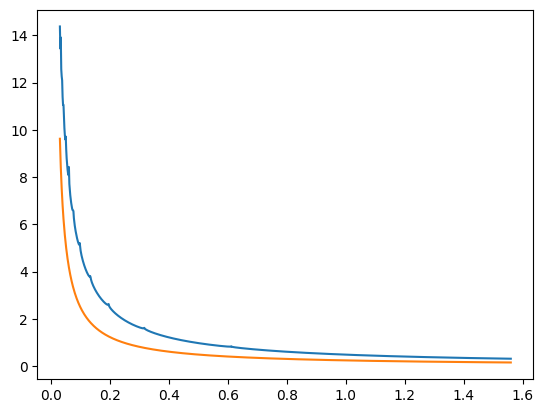

In [73]:
plt.plot(data['r'], data['kappa'])
plt.plot(data2['r'], data2['kappa'])